In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 30)


In [6]:
# Load the AIT log data set v2

path_russellmitchell = "../AIT_LD-v2/russellmitchell"
df_auth = pd.read_csv(path_russellmitchell + "/gather/intranet_server/logs/auth.log", header=None)
df_auth.columns = ['date_time', 'log_provider', 'message']

# Display the first few rows of the data set
df_auth.head(2)

# Display the entries corresponding to attack (rows 144-151)
print(df_auth.iloc[144:152])

           date_time      log_provider                        message
144  Jan 24 04:37:40   intranet-server   su[27950]: Successful su ...
145  Jan 24 04:37:40   intranet-server   su[27950]: + /dev/pts/1 w...
146  Jan 24 04:37:40   intranet-server   su[27950]: pam_unix(su:se...
147  Jan 24 04:37:40   intranet-server   systemd-logind[957]: New ...
148  Jan 24 04:37:58   intranet-server   sudo:    jhall : TTY=pts/...
149  Jan 24 04:38:06   intranet-server   sudo:    jhall : TTY=pts/...
150  Jan 24 04:38:06   intranet-server   sudo: pam_unix(sudo:sessi...
151  Jan 24 04:38:06   intranet-server   sudo: pam_unix(sudo:sessi...


In [7]:
import json

# load labels from json line by line
auth_labels_data = []

with open(path_russellmitchell + "/labels/intranet_server/logs/auth.log") as file:
    for line in file:
        auth_labels_data.append(json.loads(line))

# Convert to DF and display the first few rows of the data set
df_auth_labels = pd.DataFrame(auth_labels_data)

df_auth_labels

,line,labels,rules
0,145,"[attacker_change_user, esc...",{'attacker_change_user': [...
1,146,"[attacker_change_user, esc...",{'attacker_change_user': [...
2,147,"[attacker_change_user, esc...",{'attacker_change_user': [...
3,148,"[attacker_change_user, esc...",{'attacker_change_user': [...
4,149,"[escalated_command, escala...",{'escalated_command': ['at...
5,150,"[escalated_command, escala...",{'escalated_command': ['at...
6,151,"[escalated_command, escala...",{'escalated_command': ['at...
7,152,"[escalated_command, escala...",{'escalated_command': ['at...


In [8]:
# Add Labels and true_type to dataset (true_type = 1 for attack)
for index, row in df_auth_labels.iterrows():
    line = row['line']
    labels = row['labels']
    df_auth.loc[line-1, 'true_type'] = "1"
    df_auth.loc[line-1, 'labels'] = str(labels)

# Add true_type = 0 for normal
df_auth['true_type'] = df_auth['true_type'].replace("n", "0")

df_auth.iloc[142:154]


,date_time,log_provider,message,true_type,labels
142,Jan 24 04:17:01,intranet-server,CRON[27933]: pam_unix(cro...,0,nan
143,Jan 24 04:17:01,intranet-server,CRON[27933]: pam_unix(cro...,0,nan
144,Jan 24 04:37:40,intranet-server,su[27950]: Successful su ...,1,"['attacker_change_user', '..."
145,Jan 24 04:37:40,intranet-server,su[27950]: + /dev/pts/1 w...,1,"['attacker_change_user', '..."
146,Jan 24 04:37:40,intranet-server,su[27950]: pam_unix(su:se...,1,"['attacker_change_user', '..."
147,Jan 24 04:37:40,intranet-server,systemd-logind[957]: New ...,1,"['attacker_change_user', '..."
148,Jan 24 04:37:58,intranet-server,sudo: jhall : TTY=pts/...,1,"['escalated_command', 'esc..."
149,Jan 24 04:38:06,intranet-server,sudo: jhall : TTY=pts/...,1,"['escalated_command', 'esc..."
150,Jan 24 04:38:06,intranet-server,sudo: pam_unix(sudo:sessi...,1,"['escalated_command', 'esc..."
151,Jan 24 04:38:06,intranet-server,sudo: pam_unix(sudo:sessi...,1,"['escalated_command', 'esc..."


In [9]:
df_auth.head()

,date_time,log_provider,message,true_type,labels
0,Jan 23 06:25:05,intranet-server,CRON[22883]: pam_unix(cro...,0,nan
1,Jan 23 06:39:01,intranet-server,CRON[23064]: pam_unix(cro...,0,nan
2,Jan 23 06:39:01,intranet-server,CRON[23064]: pam_unix(cro...,0,nan
3,Jan 23 06:47:01,intranet-server,CRON[23137]: pam_unix(cro...,0,nan
4,Jan 23 06:47:02,intranet-server,CRON[23137]: pam_unix(cro...,0,nan


In [10]:
df_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_time     272 non-null    object
 1   log_provider  272 non-null    object
 2   message       272 non-null    object
 3   true_type     272 non-null    object
 4   labels        272 non-null    object
dtypes: object(5)
memory usage: 10.8+ KB


In [13]:
df_auth.describe()

,date_time,log_provider,message,true_type,labels
count,272,272,272,272,272
unique,139,1,272,2,6
top,Jan 24 04:37:40,intranet-server,CRON[22883]: pam_unix(cro...,0,nan
freq,4,272,1,264,264


In [19]:
df_auth.describe(include="object")

,date_time,log_provider,message,true_type,labels
count,272,272,272,272,272
unique,139,1,272,2,6
top,Jan 24 04:37:40,intranet-server,CRON[22883]: pam_unix(cro...,0,nan
freq,4,272,1,264,264


In [20]:
df_auth.isnull().sum()

date_time       0
log_provider    0
message         0
true_type       0
labels          0
dtype: int64

In [39]:
df_auth.duplicated().sum()

0

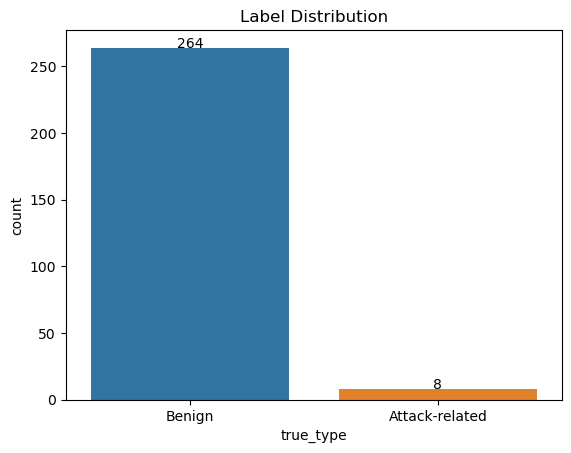

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_auth['true_type'])
plt.title("Label Distribution")
plt.xticks(ticks=[0,1], labels=['Benign', 'Attack-related'])

for i in range(2):
    count = df_auth['true_type'].value_counts().values[i]
    plt.text(i, count, str(count), ha = 'center')
plt.show()